In [1]:
from jax.random import PRNGKey, split

import hyperiax

In [2]:
key = PRNGKey(0)

# Creating the Tree

First, we initialize the tree. 
This can be done by mutliple methods

``hyperiax.tree.builders.symmetric_tree(h,branching)``

builds a symmetric tree, with h depth, and branching
note the tree does not include a length of the branches

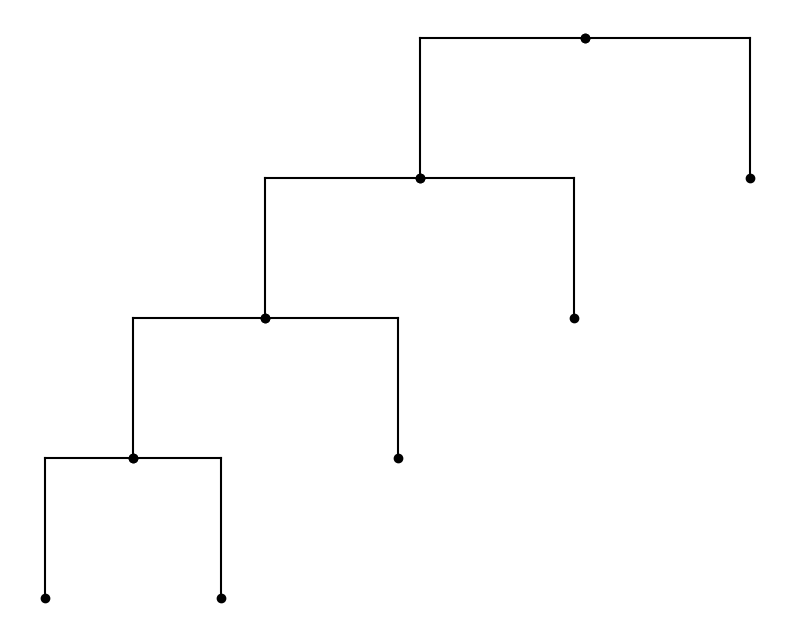

In [3]:
import hyperiax.tree
tree = hyperiax.tree.builders.asymmetric_tree(4)

tree.plot_tree()

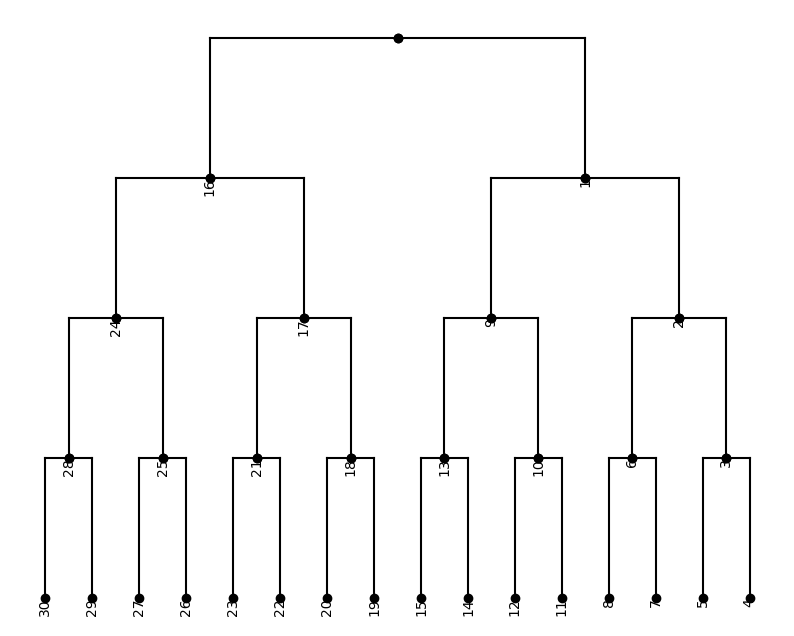

In [4]:
import hyperiax.tree
tree = hyperiax.tree.builders.symmetric_tree(4,2)

#tree = hyperiax.tree.builders.asymmetric_tree(4)

for i,leaf in enumerate(tree.iter_dfs()):
    leaf.name=str(i)
tree.plot_tree(inc_names=True)


# Add branch length 
We then iterate over all of the nodes in the tree breadth first using `iter_bfs()`, and for each node, we set the data to be the normal sample (`node.data`) and an edge with an value are assigned

In [5]:
# Add branch length

for node in tree.iter_bfs():
    node.data["edge_length"] =  1


# Add data to entire tree

First, we initialize the tree. 

``jaxtrees.tree.initializers.initialize_noise`` Will place a `shape` shaped sample from the unit normal $\mathcal{N}(0,1)$ in `node.data`. 

Note that node.data, now have to lists (1) the length and (2), our sampled data

In [6]:
subkey, key = split(key)
noise_tree = hyperiax.tree.initializers.initialize_noise(tree, key, (2,))

In [7]:
noise_tree.root.children

[TreeNode({'x': 3.5, 'y': -1, 'edge_length': 1, 'noise': Array([-1.2105676, -0.3317731], dtype=float32)}) with 2 children,
 TreeNode({'x': 11.5, 'y': -1, 'edge_length': 1, 'noise': Array([-0.32677713, -0.31295425], dtype=float32)}) with 2 children]

## Add leaf names

In [8]:
k = 0
for leaf in noise_tree.iter_leaves():
    leaf.name = str(k)
    k += 1
    print(leaf.name,leaf.data["edge_length"])


0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1


## Save the tree structure for future use 
For now, there is a problem with the new defination of edgelength, tba


In [9]:
tree_str  = noise_tree.to_newick()
print(tree_str)

((((0:1,1:1)28:1,(2:1,3:1)25:1)24:1,((4:1,5:1)21:1,(6:1,7:1)18:1)17:1)16:1,(((8:1,9:1)13:1,(10:1,11:1)10:1)9:1,((12:1,13:1)6:1,(14:1,15:1)3:1)2:1)1:1)0:1;


## Load tree from newick format 

tbd, with including the length 


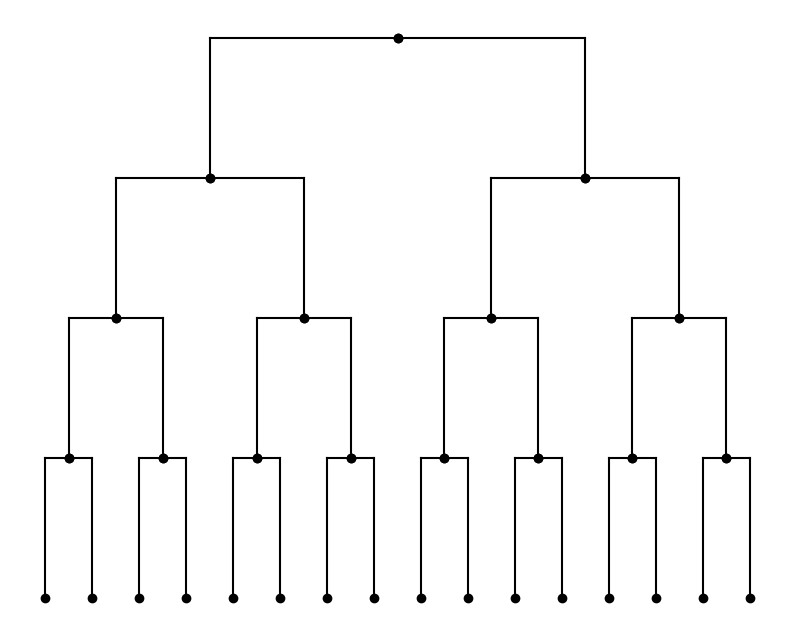

In [10]:
jax_tree = hyperiax.tree.builders.tree_from_newick(tree_str)
jax_tree.plot_tree()

# Example of large tree

Tree from Kawahara 2023 (DOI: 10.1038/s41559-023-02041-9)

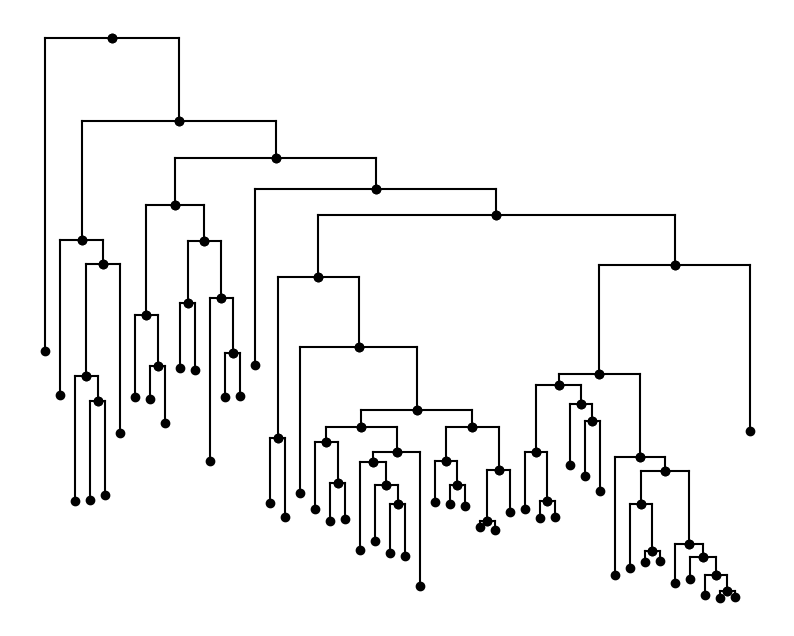

In [13]:
string_tree = "(Baronia_brevicornis:0.1711,((Iphiclides_podalirius:0.08472,((Graphium_evemon:0.06883,(Graphium_sarpedon:0.05466,Graphium_agamemnon:0.05188)QS1811:0.01369)QS1810:0.06096,Protographium_marcellus:0.09227)QS1808:0.01315)QS1807:0.0653,(((Hypermnestra_helios:0.04444,(Parnassius_orleans:0.01792,Parnassius_honrathi:0.03123)QS1821:0.0276)QS1820:0.06041,((Archon_apollinus:0.03581,Luehdorfia_puziloi:0.03646)QS1826:0.03388,(Sericinus_montela:0.08969,(Zerynthia_polyxena:0.02408,Allancastria_cerisyi:0.02345)QS1831:0.03039)QS1828:0.03093)QS1825:0.01972)QS1819:0.02572,(Teinopalpus_imperialis:0.09583,(((Battus_polydamas:0.0359,Battus_belus:0.04337)QS1835:0.08774,(Pharmacophagus_antenor:0.07956,(((Trogonoptera_brookiana:0.03698,(Troides_rhadamantus:0.02074,Ornithoptera_richmondia:0.01965)QS1840:0.02241)QS1839:0.00805,((Euryades_corethrus:0.04833,(Parides_agavus:0.03072,(Parides_photinus:0.02647,Parides_eurimedes:0.02819)QS1844:0.0108)QS1843:0.01245)QS1842:0.00564,Cressida_cressida:0.07354)QS1841:0.01338)QS1838:0.00944,((Byasa_alcinous:0.02248,(Atrophaneura_semperi:0.01043,Atrophaneura_dixoni:0.01171)QS1847:0.0129)QS1846:0.01879,((Pachliopta_aristolochiae:0.00348,Pachliopta_kotzebuea:0.00499)QS1849:0.0278,Losaria_coon:0.02297)QS1848:0.02356)QS1845:0.00935)QS1837:0.03434)QS1836:0.03812)QS1834:0.03412,((((Papilio_aristodemus:0.03095,(Papilio_thoas:0.00907,Papilio_cresphontes:0.00884)QS1855:0.02664)QS1854:0.03683,(Papilio_slateri:0.03379,(Papilio_glaucus:0.03012,Papilio_troilus:0.03835)QS1858:0.0096)QS1856:0.01012)QS1853:0.00628,(Papilio_gigon:0.06457,((Papilio_xuthus:0.03532,(Papilio_polyxenes:0.00579,Papilio_zelicaon:0.00541)QS1866:0.02599)QS1863:0.01789,(Papilio_deiphobus:0.02135,(Papilio_protenor:0.01221,(Papilio_polytes:0.01127,(Papilio_phestus:0.00377,Papilio_ambrax:0.00325)QS1872:0.00893)QS1871:0.00991)QS1870:0.007)QS1868:0.03981)QS1862:0.00747)QS1861:0.04588)QS1852:0.05955,Meandrusa_sciron:0.09096)QS1851:0.02719)QS1833:0.01405)QS1832:0.01719)QS1818:0.02038)QS1804:0.04527)QS1803:0;"

tree =hyperiax.tree.builders.tree_from_newick(string_tree)
tree.plot_tree()